In [125]:
## Import necessary modules 
fdata=[[],[]]
from astropy.io import fits
from astropy.wcs import WCS
from astropy.stats import sigma_clipped_stats
import glob
import os
import subprocess
import warnings
import numpy as np
import matplotlib.pyplot as plt
import photutils
import pyregion

# You can ignore any warnings that appear below, but if any modules can't be imported you need to install them

In [126]:
from astropy.coordinates import SkyCoord
#for target
RA=302.96325
DEC=34.4131034
RA=f"{RA:.8f}"
DEC=f"{DEC:.8f}"
print(RA, DEC)
#RA/Dec=302.96326,34.413103
target = SkyCoord(ra=[RA], dec=[DEC], frame='icrs', unit='degree')

302.96325000 34.41310340


In [127]:
import os
folder = "/home/adarsh/Documents/Astro/Berkeley51/processing/"   # directory with FITS files
#file_paths = sorted(glob.glob(os.path.join(folder,'*.wcs.proc.fits')))
file_paths = sorted(glob.glob(os.path.join(folder,'*.wcs.proc.fits')))
print(len(file_paths))
print(file_paths)
f=file_paths

20
['/home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251015190-231-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251015190-346-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251016145-304-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251016174-802-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251018145-922-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251018175-215-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251019142-115-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251020135-925-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251023143-315-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley51/processing/20251024153-245-RA.wcs.proc.fits', '/home/adarsh/Documents/Astro/Berkeley5

In [172]:
x=0
imageName=file_paths[x]
hdu=fits.open(f[x])
header=hdu[0].header
H=header
print(hdu.info())
dataI=hdu[0].data
hdu.close()
print(header['DATE-OBS'])
#header

Filename: /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     205   (1608, 1104)   float64   
None
2025-10-13T15:43:19


In [173]:
print(header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 1608                                                  NAXIS2  =                 1104                                                  DATE-OBS= '2025-10-13T15:43:19' /YYYY-MM-DDThh:mm:ss observation start, UT      EXPTIME =   30.000000000000000 /Exposure time in seconds                        EXPOSURE=   30.000000000000000 /Exposure time in seconds                        SET-TEMP=  -20.000000000000000 /CCD temperature setpoint in C                   CCD-TEMP=  -19.200000762939453 /CCD temperature at start of exposure in C       XPIXSZ  =   9.0000000000000000 /Pixel Width in microns (after binning)          YPIXSZ  =   9.0000000000000000 /Pixel Height in microns (after binning)         XBINNING=                    2 /Binning 

In [174]:
mean, median, sigma=sigma_clipped_stats(dataI)
'''plt.figure(figsize=(14,14))

plt.imshow(dataI,origin='lower',vmin=median-2*sigma,vmax=median+20*sigma)

plt.colorbar()
plt.show()'''

"plt.figure(figsize=(14,14))\n\nplt.imshow(dataI,origin='lower',vmin=median-2*sigma,vmax=median+20*sigma)\n\nplt.colorbar()\nplt.show()"

In [175]:
configFile = 'photomCat.sex'
catalogName = imageName+'.cat'
paramName = 'photomCat.param'
try:
    command = 'sex -c %s %s -CATALOG_NAME %s -PARAMETERS_NAME %s' % (configFile, imageName, catalogName, paramName)
    print('Executing command: %s' % command)
    rval = subprocess.run(command.split(), check=True)
except subprocess.CalledProcessError as err:
    print('Could not run sextractor with exit error %s'%err)

Executing command: sex -c photomCat.sex /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits -CATALOG_NAME /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits.cat -PARAMETERS_NAME photomCat.param


> 
----- SExtractor 2.29.0 started on 2025-11-02 at 22:18:17 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for 20251013154-319-RA.wcs.proc.fits
----- Measuring from: 20251013154-319-RA.wcs.proc.fits
      "Berkeley51" / no ext. header / 1608x1104 / 64 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  512
> Setting up background map at line: 1024
> Filtering background map(s)
> Computing background d-map
> Computing background-noise d-map
(M+D) Background: 3.03445    RMS: 1.15543    / Threshold: 11.5543    
> Scanning image
> Line:   25  Objects:        3 detected /        0 sextracted
> Line:   50  Objects:        8 detected /        0 sextracted
> Line:   75  Objects:       13 detected /        0 sextracted
> Line:  100  Objects:       18 detected /        0 sextracted
> Line: 

In [176]:
configFile = 'photomCat.sex'
catalogName = imageName+'.cat'
paramName = 'photomCat.param'
psfConfigFile = 'psfex_conf.psfex'
try:
    command = 'psfex -c %s %s' % (psfConfigFile, catalogName)
    print('Executing command: %s' % command)
    rval = subprocess.run(command.split(), check=True)
except subprocess.CalledProcessError as err:
    print('Could not run psfex with exit error %s'%err)

Executing command: psfex -c psfex_conf.psfex /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits.cat


<function matplotlib.pyplot.show(close=None, block=None)>

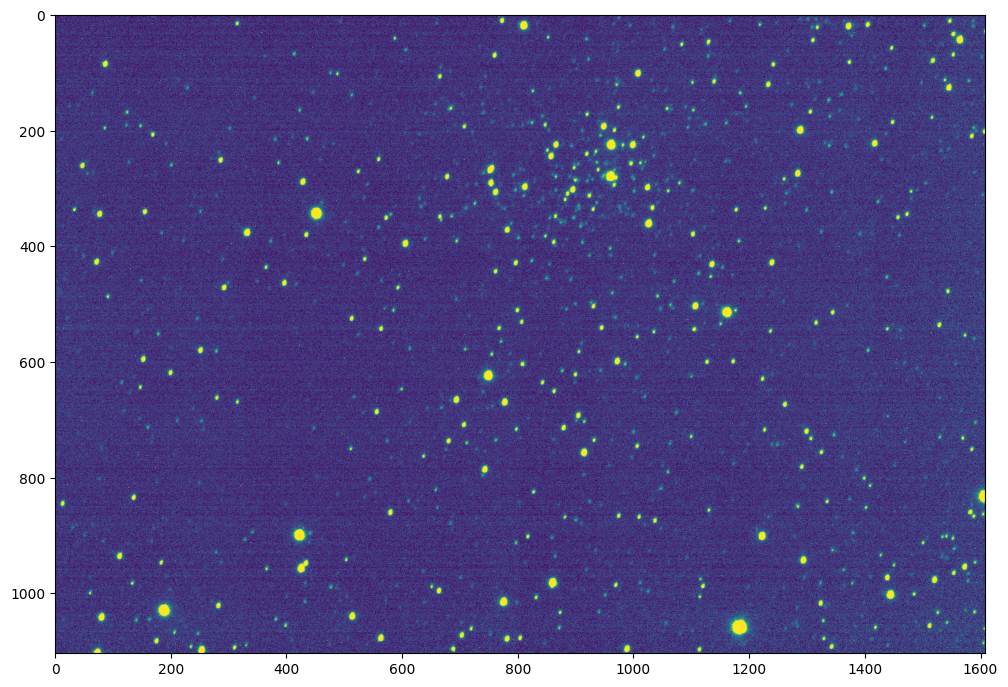

In [177]:
mean,median,std=sigma_clipped_stats(dataI)
plt.figure(figsize=(12,16))
plt.imshow(dataI,vmin=median-2*std,vmax=median+10*std)
plt.show

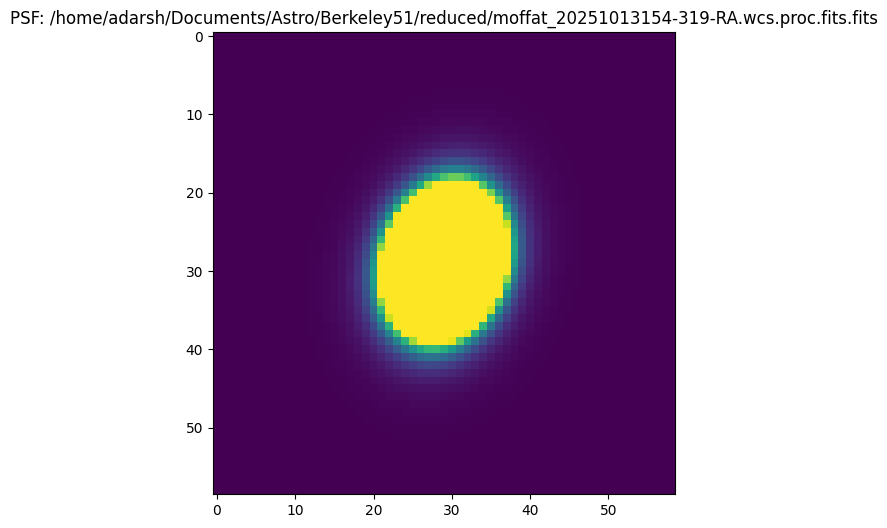

In [178]:
import os
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
#moffat_20230204232755-635-RA.wcs.proc.fits.fits
# Full path to your image
imagePath = imageName

# Extract just the image filename without directories
imagename = os.path.basename(imagePath)  

# Remove original extension
imageNameNoExt = os.path.splitext(imagename)[0]  # '20230204232755-635-RA.wcs.proc'

# Construct the PSF FITS filename
psfFilename = f'/home/adarsh/Documents/Astro/Berkeley51/reduced/moffat_{imagename}.fits'

# Open PSF model FITS
psfModelHDU = fits.open(psfFilename)[0]
psfModelData = psfModelHDU.data

# Compute sigma-clipped stats
mean, median, std = sigma_clipped_stats(psfModelData)

# Display PSF image
plt.figure(figsize=(6,6))
plt.imshow(psfModelData, vmin=0, vmax=median+20*std)
plt.title(f'PSF: {psfFilename}')
plt.show()


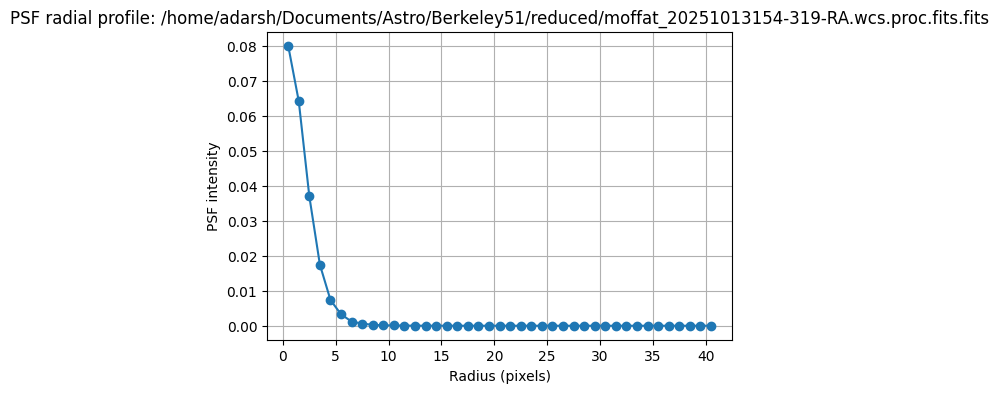

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

# -------------------------
# Load PSF FITS
# -------------------------
psfFilename = f'/home/adarsh/Documents/Astro/Berkeley51/reduced/moffat_{imagename}.fits'
psfModelHDU = fits.open(psfFilename)[0]
psfData = psfModelHDU.data

# -------------------------
# Compute sigma-clipped stats
# -------------------------
mean, median, std = sigma_clipped_stats(psfData)

# -------------------------
# Find center of PSF (assume brightest pixel)
# -------------------------
y0, x0 = np.unravel_index(np.argmax(psfData), psfData.shape)

# -------------------------
# Compute radial profile
# -------------------------
y, x = np.indices(psfData.shape)
r = np.sqrt((x - x0)**2 + (y - y0)**2)

# Bin pixels by radius
r = r.flatten()
psf_flat = psfData.flatten()

# Define radial bins
r_bins = np.arange(0, int(r.max())+1, 1)
r_bin_centers = 0.5*(r_bins[1:] + r_bins[:-1])
psf_profile = np.zeros_like(r_bin_centers)

# Compute median PSF value in each radial bin
for i in range(len(r_bin_centers)):
    mask = (r >= r_bins[i]) & (r < r_bins[i+1])
    if np.any(mask):
        psf_profile[i] = np.median(psf_flat[mask])
    else:
        psf_profile[i] = 0

# -------------------------
# Plot radial PSF profile
# -------------------------
plt.figure(figsize=(6,4))
plt.plot(r_bin_centers, psf_profile, marker='o', linestyle='-')
plt.xlabel('Radius (pixels)')
plt.ylabel('PSF intensity')
plt.title(f'PSF radial profile: {psfFilename}')
plt.grid(True)
plt.show()


In [180]:
psfName = imageName + '.psf'
psfcatalogName = imageName+'.psf.cat'
psfparamName = 'photomPSF.param' #This is a new set of parameters to be obtained from SExtractor, including PSF-fit magnitudes
try:
    #We are supplying SExtactor with the PSF model with the PSF_NAME option
    command = 'sex -c %s %s -CATALOG_NAME %s -PSF_NAME %s -PARAMETERS_NAME %s' % (configFile, imageName, psfcatalogName, psfName, psfparamName)
    print("Executing command: %s" % command)
    rval = subprocess.run(command.split(), check=True)
except subprocess.CalledProcessError as err:
    print('Could not run sextractor with exit error %s'%err)

Executing command: sex -c photomCat.sex /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits -CATALOG_NAME /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits.psf.cat -PSF_NAME /home/adarsh/Documents/Astro/Berkeley51/processing/20251013154-319-RA.wcs.proc.fits.psf -PARAMETERS_NAME photomPSF.param


> 
----- SExtractor 2.29.0 started on 2025-11-02 at 22:18:21 with 1 thread

> Setting catalog parameters
> Reading PSF information
> Preparing profile models
Fitting model: point source
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for 20251013154-319-RA.wcs.proc.fits
----- Measuring from: 20251013154-319-RA.wcs.proc.fits
      "Berkeley51" / no ext. header / 1608x1104 / 64 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:  512
> Setting up background map at line: 1024
> Filtering background map(s)
> Computing background d-map
> Computing background-noise d-map
(M+D) Background: 3.03445    RMS: 1.15543    / Threshold: 11.5543    
> Scanning image
> Line:    1  Objects:        0 detected /        0 sextracted
> Line:    2  Objects:        0 detected /        0 sextracted
> Line:    3  Objects:        0 detected /        0 s

In [181]:
def get_table_from_ldac(filename, frame=1):
    """
    Load an astropy table from a fits_ldac by frame (Since the ldac format has column 
    info for odd tables, giving it twce as many tables as a regular fits BinTableHDU,
    match the frame of a table to its corresponding frame in the ldac file).
    
    Parameters
    ----------
    filename: str
        Name of the file to open
    frame: int
        Number of the frame in a regular fits file
    """
    from astropy.table import Table
    if frame>0:
        frame = frame*2
    tbl = Table.read(filename, hdu=frame)
    return tbl

In [182]:
# -------------------------------
# Full Python Script: Astroquery Vizier
# -------------------------------

from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
import astropy.units as u
import pandas as pd

def query_vizier(ra, dec, radius_arcmin=5, catalog_id="II/246", columns=None, row_limit=100):
    """
    Query Vizier around given RA/Dec and return a Pandas DataFrame.

    Parameters:
    -----------
    ra : float
        Right Ascension in degrees
    dec : float
        Declination in degrees
    radius_arcmin : float
        Search radius in arcminutes (default 5')
    catalog_id : str
        Vizier catalog ID (default "II/246" for 2MASS)
    columns : list of str
        Columns to retrieve. Default None (all columns)
    row_limit : int
        Max number of rows to retrieve (default 100)
    
    Returns:
    --------
    pd.DataFrame
        Queried catalog as a DataFrame
    """
    # Create SkyCoord object
    coord = SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')
    
    # Initialize Vizier
    viz = Vizier(columns=columns, row_limit=row_limit)
    
    # Perform cone search
    result = viz.query_region(coord, radius=radius_arcmin*u.arcmin, catalog=[catalog_id])
    
    if len(result) == 0:
        print("No sources found in this region.")
        return pd.DataFrame()
    
    # Convert the first table to a Pandas DataFrame
    table=result 
    
    return table

# -------------------------------
# Example Usage
# -------------------------------



In [183]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.vizier import Vizier
import pandas as pd
from astropy.wcs import WCS
# -------------------------------
# WCS: convert image center to RA/Dec
w=WCS(H)
# Image center coordinates (pixel indices)
y_center = dataI.shape[0]/2
x_center = dataI.shape[1]/2
raImage, decImage = w.all_pix2world(y_center, x_center, 1)  # note order: X, Y
#raImage,decImage =   302.96324999999996,34.41311111111111 
columns = ['RAJ2000','DEJ2000','rmag','e_gmag','Nd']
print(raImage, decImage)
# -------------------------------
# Set search radius and magnitude cut-offs
# -------------------------------
boxsize = 7.0  # arcminutes
mag_min = 10   # example: brightest
mag_max = 18   # example: faintest
XD=query_vizier(raImage, decImage, radius_arcmin=boxsize, catalog_id='II/349',
                          columns=columns, row_limit=50000)
print(XD[0])


302.88578682406194 34.40828029076922
   RAJ2000       DEJ2000      rmag   e_gmag  Nd
     deg           deg        mag     mag      
------------- ------------- ------- ------- ---
302.961374660  34.313346280      --      --   5
302.949124550  34.305379690      --      --   3
302.953148150  34.309894600      --      --   3
302.958186170  34.316760310      --      --   6
302.960086200  34.312280470 21.6097      --  32
302.953851590  34.307867010 19.1080  0.0280  58
302.960204810  34.315760170 20.9880      --  21
302.952359400  34.310346550 20.0073  0.0775  59
302.956684880  34.308514440 20.0347  0.0311  29
          ...           ...     ...     ... ...
302.870072400  34.515786250 20.5411      --  49
302.854550890  34.521588070      --      --   5
302.891981850  34.524812830      --  0.0350   8
302.957805840  34.505149020 13.7872  0.0003  53
302.949813650  34.511489130 20.3560      --  34
302.961314560  34.502473470 20.7201  0.1814  38
302.963059800  34.504952660      --      --  10
302

In [184]:
ga2_imCoords=w.all_world2pix(XD[0]['RAJ2000'],XD[0]['DEJ2000'],1)
good_stars=XD[0]
'''[(XD[0]['RAJ2000']<197.6)&(XD[0]['RAJ2000']>197.5)&(XD[0]['DEJ2000']>(-21.7))&(XD[0]['DEJ2000']<(-21.6))]'''
#[np.where((ga2_imCoords[0]>500)&(ga2_imCoords[0]<3500)&(ga2_imCoords[1]>500)&(ga2_imCoords[1]<3500))]
print(good_stars)

   RAJ2000       DEJ2000      rmag   e_gmag  Nd
     deg           deg        mag     mag      
------------- ------------- ------- ------- ---
302.961374660  34.313346280      --      --   5
302.949124550  34.305379690      --      --   3
302.953148150  34.309894600      --      --   3
302.958186170  34.316760310      --      --   6
302.960086200  34.312280470 21.6097      --  32
302.953851590  34.307867010 19.1080  0.0280  58
302.960204810  34.315760170 20.9880      --  21
302.952359400  34.310346550 20.0073  0.0775  59
302.956684880  34.308514440 20.0347  0.0311  29
          ...           ...     ...     ... ...
302.870072400  34.515786250 20.5411      --  49
302.854550890  34.521588070      --      --   5
302.891981850  34.524812830      --  0.0350   8
302.957805840  34.505149020 13.7872  0.0003  53
302.949813650  34.511489130 20.3560      --  34
302.961314560  34.502473470 20.7201  0.1814  38
302.963059800  34.504952660      --      --  10
302.957151560  34.501898970 17.0407  0.0

In [185]:
ga2_abs_coords=w.all_world2pix(XD[0]['RAJ2000'],XD[0]['DEJ2000'],1)
ga1_abs_coords=w.all_world2pix(good_stars['RAJ2000'],good_stars['DEJ2000'],1)

In [186]:
'''fig=plt.figure(figsize=(10,10))
ax=fig.gca()
mean, median, sigma=sigma_clipped_stats(dataI)
plt.imshow(dataI,origin='lower',vmin=median-2*sigma,vmax=median+20*sigma)'''
#circles=[plt.Circle((ga2_abs_coords[0][i],ga2_abs_coords[1][i]),radius=5,edgecolor='r',facecolor='None')for i in range(len(ga2_abs_coords[0]))]
#l=[plt.Circle((ga1_abs_coords[0][i],ga1_abs_coords[1][i]),radius=5,edgecolor='orange',facecolor='None')for i in range(len(ga1_abs_coords[0]))]
#for c in l:
#    ax.add_artist(c)
#plt.colorbar()
plt.show()

In [187]:
procHDU = fits.PrimaryHDU(dataI)  # Create a new HDU with the processed image data
procHDU.header = header       # Copy over the header from the raw file
procHDU.header.add_history('Bias corrected and flat-fielded') # Add a note to the header
procHDU.writeto('/home/adarsh/Documents/Astro/Berkeley51/processing/lol.fits', overwrite=True)

In [188]:
psfsourceTable = get_table_from_ldac(psfcatalogName)
clean_psf=psfsourceTable[(psfsourceTable['FLAGS']==0)&(psfsourceTable['FLAGS_MODEL']==0)&(psfsourceTable['FWHM_WORLD']<2)&(psfsourceTable['XMODEL_IMAGE']>200)&(psfsourceTable['XMODEL_IMAGE']<1400)&(psfsourceTable['YMODEL_IMAGE']>100)&(psfsourceTable['YMODEL_IMAGE']<1000)]
clean_psf_coords=SkyCoord(ra=clean_psf['ALPHAWIN_J2000'],dec=clean_psf['DELTAWIN_J2000'],frame='icrs',unit='degree')
ps1CatCoords = SkyCoord(ra=good_stars['RAJ2000'], dec=good_stars['DEJ2000'], frame='icrs', unit='degree')
#print((ps1CatCoords))
print(psfsourceTable)
#Selecting the clean sources away from image edges as before 
import astropy.units as u
#Set the cross-match distance threshold to 0.6 arcsec, or just about one pixel
photoDistThresh = 3
idx_psfimage, idx_psfps1, d2d, d3d = ps1CatCoords.search_around_sky(clean_psf_coords, photoDistThresh*u.arcsec)

print('Found %d good cross-matches'%len(idx_psfimage))

           VIGNET              X_IMAGE   ... FLUXRATIOERR_POINTSOURCE
             ct                  pix     ...                         
---------------------------- ----------- ... ------------------------
  0.03787279 ..   0.05923343   1372.5769 ...                  0.00000
  -0.1648605 ..   -0.1650925    811.3437 ...                  0.00000
    1.107535 ..   -0.9423652   1405.9105 ...                  0.00000
      -1e+30 ..    0.1020548   1547.6206 ...                  0.00000
      -1e+30 ..   -0.1869166    773.4759 ...                  0.00000
      -1e+30 ..       -1e+30   1343.1569 ...                  0.00000
   -1.052278 ..       -1e+30    254.2996 ...                  0.00000
     1.98584 ..       -1e+30     74.4754 ...                  0.00000
   -2.073328 ..  -0.03403902    176.0552 ...                  0.00000
                         ...         ... ...                      ...
   -1.079939 ..  -0.06100225   1084.0176 ...                  0.00000
    6.249723 ..     

In [189]:
print(len(ps1CatCoords))
print(len(clean_psf_coords))

11225
103


Text(0, 0.5, 'Instrumental magnitude')

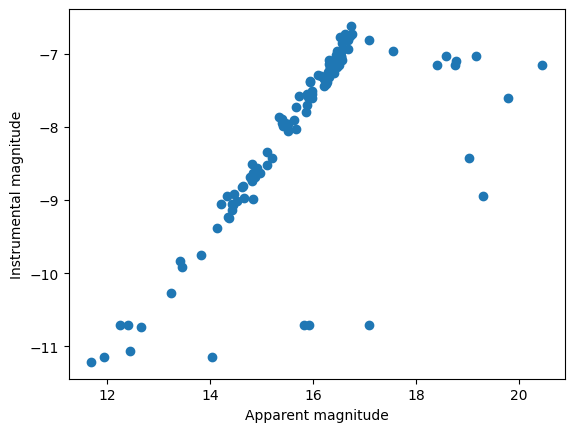

In [190]:
plt.scatter(good_stars['rmag'][idx_psfps1],clean_psf['MAG_POINTSOURCE'][idx_psfimage])
plt.xlabel('Apparent magnitude')
plt.ylabel('Instrumental magnitude')

In [191]:
psfoffsets = np.ma.array(good_stars['rmag'][idx_psfps1] - clean_psf['MAG_POINTSOURCE'][idx_psfimage])
#Compute sigma clipped statistics
zero_psfmean, zero_psfmed, zero_psfstd = sigma_clipped_stats(psfoffsets)
print('PSF Mean ZP: %.2f\nPSF Median ZP: %.2f\nPSF STD ZP: %.2f'%(zero_psfmean, zero_psfmed, zero_psfstd))

PSF Mean ZP: 23.51
PSF Median ZP: 23.52
PSF STD ZP: 0.12


In [192]:
photoDistThresh=1

In [193]:
# Cross-match PSF sources to good stars to compute zero point
idx_psfimage, idx_psfps1, d2d, d3d = ps1CatCoords.search_around_sky(clean_psf_coords, photoDistThresh*u.arcsec)

psfoffsets = np.ma.array(good_stars['rmag'][idx_psfps1] - clean_psf['MAG_POINTSOURCE'][idx_psfimage])
zero_psfmean, zero_psfmed, zero_psfstd = sigma_clipped_stats(psfoffsets)
print(zero_psfmed)
# Cross-match target
idx_target, idx_cleanpsf_target, d2d, d3d = clean_psf_coords.search_around_sky(target, photoDistThresh*u.arcsec)

target_psfinstmag = clean_psf['MAG_POINTSOURCE'][idx_cleanpsf_target[0]]
target_psfinstmagerr = clean_psf['MAGERR_POINTSOURCE'][idx_cleanpsf_target[0]]
print(len(idx_target))
target_psfmag = zero_psfmed + target_psfinstmag
target_psfmagerr = np.sqrt(target_psfinstmagerr**2 + zero_psfstd**2)




23.515695513153076
1


In [194]:
print(RA,DEC)
print('PSF-fit magnitude is %.2f +/- %.2f' % (target_psfmag, target_psfmagerr))
print(header['AIRMASS'])
print(header['DATE-OBS'])
print(f'Processed psf magnitude={header['psf_mag']} +/- {header['psf_merr']}')

302.96325000 34.41310340
PSF-fit magnitude is 14.57 +/- 0.11
1.1395210871012393
2025-10-13T15:43:19
Processed psf magnitude=13.685 +/- 0.122


In [78]:
'''import pandas as pd
import os


# Safely extract header values
psf_mag_processed = header.get('psf_mag', None)
psf_merr_processed = header.get('psf_merr', None)

# Prepare the row
data = {
    'RA': [RA],
    'DEC': [DEC],
    'PSF_Fit_Mag': [target_psfmag],
    'PSF_Fit_Mag_Err': [target_psfmagerr],
    'AIRMASS': [header.get('AIRMASS')],
    'DATE-OBS': [header.get('DATE-OBS')],
    'Processed_PSF_Mag': [psf_mag_processed],
    'Processed_PSF_Mag_Err': [psf_merr_processed]
}

df_new = pd.DataFrame(data)

# CSV filename
filename = '/home/adarsh/Documents/Astro/Berkeley51/cepheid.csv'

# Append if file exists, else create new
if os.path.exists(filename):
    df_new.to_csv(filename, mode='a', index=False, header=False)
else:
    df_new.to_csv(filename, index=False)

print(f"✅ Entry added to {filename}")
print(df_new)
'''

✅ Entry added to /home/adarsh/Documents/Astro/Berkeley51/cepheid.csv
             RA          DEC  PSF_Fit_Mag  PSF_Fit_Mag_Err   AIRMASS  \
0  302.96325000  34.41310340    14.272318         0.055814  1.241176   

              DATE-OBS  Processed_PSF_Mag  Processed_PSF_Mag_Err  
0  2025-10-31T15:20:41             14.316                  0.043  


In [2196]:
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np

# Suppose 'data' is your 2D image array and 'header' is its FITS header
# Also suppose 'target' is a SkyCoord object with RA/Dec

# Build WCS for the image
from astropy.wcs import WCS
w = WCS(header)

# Convert target RA/Dec to pixel coordinates
x_target, y_target = w.world_to_pixel(target)  # returns (X, Y) in pixels

# Define cutout size: 30x30 pixels
cutout_size = (30, 30)

# Create the cutout
cutout = Cutout2D(dataI, position=(x_target, y_target), size=cutout_size, wcs=w)

# Access the cutout data and WCS
cutout_data = cutout.data
cutout_wcs = cutout.wcs

print("Cutout shape:", cutout_data.shape)


Cutout shape: (30, 30)


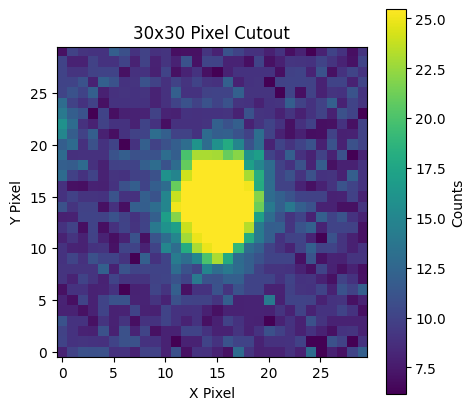

In [2197]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.stats import sigma_clipped_stats

# Suppose cutout_data is your 30x30 pixel array

# Compute median and std with sigma clipping
median, mean, std = sigma_clipped_stats(cutout_data, sigma=3.0)

# Set display limits
vmin = median - 2*std
vmax = median + 10*std

# Plot using imshow and viridis
plt.figure(figsize=(5,5))
plt.imshow(cutout_data, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Counts')
plt.title('30x30 Pixel Cutout')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()


/tmp/ipykernel_5354/4103363735.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_target = float(x_target)
/tmp/ipykernel_5354/4103363735.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_target = float(y_target)


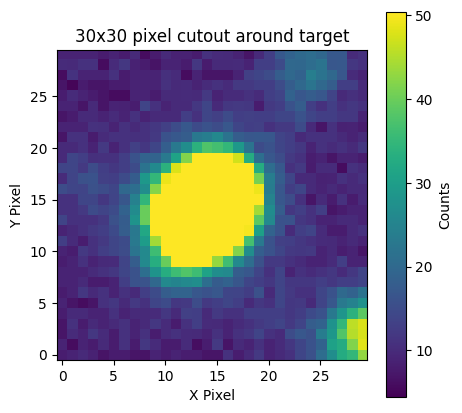

Centroid pixel position: x=14.76, y=14.05
Raw flux: 12443.16
Median background: 13.10
Background-subtracted flux: 10426.63
Aperture photometry magnitude (median bkg): 14.84 ± 0.10
788.2598571089754 408.3531676394894


In [1857]:
# -------------------------
# Imports
# -------------------------
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy.nddata.utils import Cutout2D
from astropy.wcs import WCS
from photutils.aperture import CircularAperture, CircularAnnulus, aperture_photometry
from photutils.centroids import centroid_com
from astropy.stats import sigma_clipped_stats

# -------------------------
# 1. Build WCS
# -------------------------
w = WCS(H)

# Convert target RA/Dec to pixel coordinates in the full image
x_target, y_target = w.world_to_pixel(target)
x_target = float(x_target)
y_target = float(y_target)

# -------------------------
# 2. Make 30x30 pixel cutout
# -------------------------
cutout_size = (30, 30)  # pixels
cutout = Cutout2D(dataI, position=(x_target, y_target), size=cutout_size, wcs=w)
cutout_data = np.nan_to_num(cutout.data, nan=0.0)  # clean NaNs
cutout_wcs = cutout.wcs

# -------------------------
# 3. Compute cutout stats for display
# -------------------------
median, mean, std = sigma_clipped_stats(cutout_data, sigma=3.0)
vmin, vmax = median - 2*std, median + 10*std

# -------------------------
# 4. Plot cutout
# -------------------------
plt.figure(figsize=(5,5))
plt.imshow(cutout_data, origin='lower', cmap='viridis', vmin=vmin, vmax=vmax)
plt.colorbar(label='Counts')
plt.title('30x30 pixel cutout around target')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.show()

# -------------------------
# 5. Centroiding in cutout
# -------------------------
x_centroid, y_centroid = centroid_com(cutout_data)
position = [(x_centroid, y_centroid)]
print(f"Centroid pixel position: x={x_centroid:.2f}, y={y_centroid:.2f}")

# -------------------------
# 6. Aperture photometry with median background subtraction
# -------------------------
ap_radius = 7          # pixels
annulus_r_in = 7       # pixels
annulus_r_out = 11     # pixels

aperture = CircularAperture(position, r=ap_radius)
annulus = CircularAnnulus(position, r_in=annulus_r_in, r_out=annulus_r_out)

# Photometry
ap_sum = aperture_photometry(cutout_data, aperture)
ann_sum = aperture_photometry(cutout_data, annulus)

# Compute median background in annulus
ann_mask = annulus.to_mask(method='center')
ann_data = ann_mask[0].multiply(cutout_data)
ann_data_1d = ann_data[ann_mask[0].data > 0]  # flatten non-zero pixels
bkg_median = np.median(ann_data_1d)

# Background subtraction
flux_sub = ap_sum['aperture_sum'] - bkg_median * aperture.area

print(f"Raw flux: {ap_sum['aperture_sum'][0]:.2f}")
print(f"Median background: {bkg_median:.2f}")
print(f"Background-subtracted flux: {flux_sub[0]:.2f}")

# -------------------------
# 7. Convert to PSF magnitude
# -------------------------
target_psfmag = zero_psfmed - 2.5 * math.log10(flux_sub[0])
target_psfmagerr = zero_psfstd  # or combine uncertainties if available

print(f"Aperture photometry magnitude (median bkg): {target_psfmag:.2f} ± {target_psfmagerr:.2f}")
print(x_target,y_target)

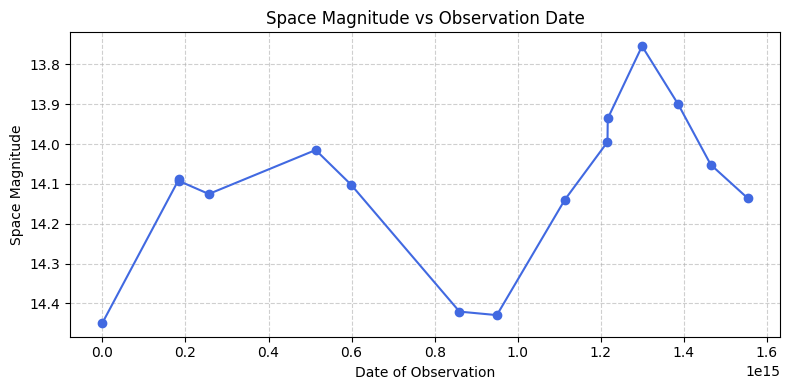

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "DATE-OBS": [
        "2025-10-13T15:43:19", "2025-10-15T19:02:31", "2025-10-15T19:03:46",
        "2025-10-16T14:53:04", "2025-10-19T14:21:15", "2025-10-20T13:59:25",
        "2025-10-23T14:33:15", "2025-10-24T15:32:45", "2025-10-26T13:00:50",
        "2025-10-27T17:32:41", "2025-10-27T17:42:44", "2025-10-28T16:39:00",
        "2025-10-29T16:54:14", "2025-10-30T14:37:14", "2025-10-31T15:20:41"
    ],
    "space mag": [
        14.4487168764333, 14.0871593860654, 14.0926978705731,
        14.1251353164749, 14.0148015986942, 14.1016092756703,
        14.4204304303731, 14.4292004739213, 14.1395867367578,
        13.9945536791067, 13.9356596711884, 13.7541091778157,
        13.9004452749884, 14.0516422813395, 14.1357882019841
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)
df["DATE-OBS"] = pd.to_datetime(df["DATE-OBS"])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(df["DATE-OBS"]-pd.to_datetime("2025-10-13T15:43:19"), df["space mag"], marker="o", color="royalblue", lw=1.5)
plt.gca().invert_yaxis()  # magnitude scale: smaller = brighter
plt.title("Space Magnitude vs Observation Date")
plt.xlabel("Date of Observation")
plt.ylabel("Space Magnitude")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


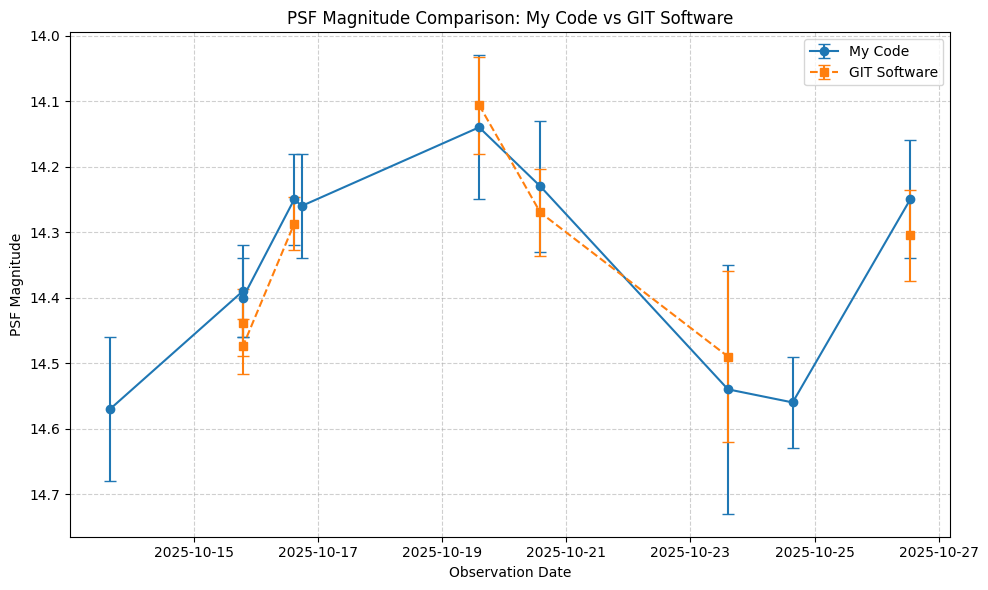

In [146]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --------------------------
# Data setup
# --------------------------
data = {
    'DATE-OBS': [
        '2025-10-13T15:43:19', '2025-10-15T19:02:31', '2025-10-15T19:03:46',
        '2025-10-16T14:53:04', '2025-10-16T17:48:02', '2025-10-19T14:21:15',
        '2025-10-20T13:59:25', '2025-10-23T14:33:15', '2025-10-24T15:32:45',
        '2025-10-26T13:00:50','2025-10-28T16:39:00'
    ],
    'psf_mag_my_code': [14.57, 14.39, 14.4, 14.25, 14.26, 14.14, 14.23, 14.54, 14.56, 14.25],
    'psf_err_my_code': [0.11, 0.07, 0.06, 0.07, 0.08, 0.11, 0.10, 0.19, 0.07, 0.09],
    'psf_mag_git': [np.nan, 14.438, 14.474, 14.287, np.nan, 14.106, 14.27, 14.49, np.nan, 14.305],
    'psf_err_git': [np.nan, 0.051, 0.042, 0.041, np.nan, 0.074, 0.067, 0.13, np.nan, 0.069],
}

df = pd.DataFrame(data)
df['DATE-OBS'] = pd.to_datetime(df['DATE-OBS'])

# --------------------------
# Plot setup
# --------------------------
plt.figure(figsize=(10, 6))

# Plot your code’s PSF magnitudes
plt.errorbar(df['DATE-OBS'], df['psf_mag_my_code'], yerr=df['psf_err_my_code'],
             fmt='o-', color='tab:blue', label='My Code', capsize=4)

# Plot GIT software PSF magnitudes
plt.errorbar(df['DATE-OBS'], df['psf_mag_git'], yerr=df['psf_err_git'],
             fmt='s--', color='tab:orange', label='GIT Software', capsize=4)

# Invert y-axis (since lower mag = brighter)
plt.gca().invert_yaxis()

# Formatting
plt.xlabel('Observation Date')
plt.ylabel('PSF Magnitude')
plt.title('PSF Magnitude Comparison: My Code vs GIT Software')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


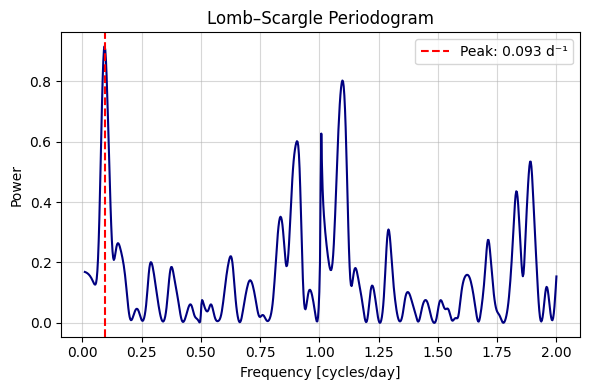

Lomb–Scargle best period ≈ 10.706 days (frequency 0.093 d⁻¹)


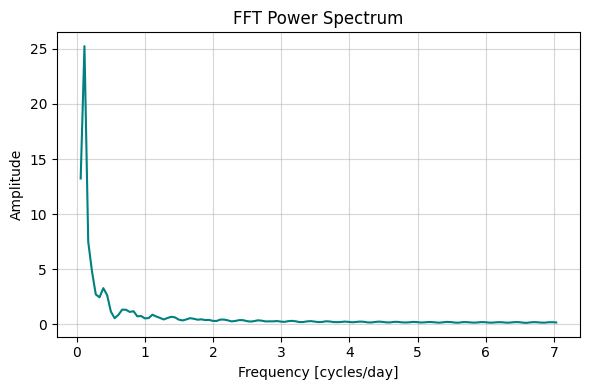

FFT dominant period ≈ 9.027 days (frequency 0.111 d⁻¹)


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# ----------------------------
# Data
# ----------------------------
data = {
    "DATE-OBS": [
        "2025-10-13T15:43:19","2025-10-15T19:02:31","2025-10-15T19:03:46",
        "2025-10-16T14:53:04","2025-10-19T14:21:15","2025-10-20T13:59:25",
        "2025-10-23T14:33:15","2025-10-24T15:32:45","2025-10-26T13:00:50",
        "2025-10-27T17:32:41","2025-10-27T17:42:44","2025-10-28T16:39:00",
        "2025-10-29T16:54:14","2025-10-30T14:37:14","2025-10-31T15:20:41"
    ],
    "mag": [
        14.4487168764333,14.0871593860654,14.0926978705731,14.1251353164749,
        14.0148015986942,14.1016092756703,14.4204304303731,14.4292004739213,
        14.1395867367578,13.9945536791067,13.9356596711884,13.7541091778157,
        13.9004452749884,14.0516422813395,14.1357882019841
    ]
}

df = pd.DataFrame(data)
df["DATE-OBS"] = pd.to_datetime(df["DATE-OBS"])
df["t_days"] = (df["DATE-OBS"] - df["DATE-OBS"].min()).dt.total_seconds() / 86400

# ----------------------------
# Lomb–Scargle Periodogram
# ----------------------------
time = df["t_days"].values
mag = df["mag"].values
mag_mean = np.mean(mag)
mag -= mag_mean  # remove mean

frequency, power = LombScargle(time, mag).autopower(
    minimum_frequency=0.01, maximum_frequency=2.0, samples_per_peak=20
)

best_freq = frequency[np.argmax(power)]
best_period = 1 / best_freq

plt.figure(figsize=(6, 4))
plt.plot(frequency, power, color="navy")
plt.title("Lomb–Scargle Periodogram")
plt.xlabel("Frequency [cycles/day]")
plt.ylabel("Power")
plt.axvline(best_freq, color="red", ls="--", label=f"Peak: {best_freq:.3f} d⁻¹")
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

print(f"Lomb–Scargle best period ≈ {best_period:.3f} days (frequency {best_freq:.3f} d⁻¹)")

# ----------------------------
# FFT Analysis
# ----------------------------
# For FFT, need evenly spaced times — interpolate magnitudes
t_even = np.linspace(time.min(), time.max(), 256)
mag_interp = np.interp(t_even, time, mag)

fft_vals = np.fft.fft(mag_interp)
fft_freqs = np.fft.fftfreq(len(t_even), d=(t_even[1]-t_even[0]))
mask = fft_freqs > 0

plt.figure(figsize=(6, 4))
plt.plot(fft_freqs[mask], np.abs(fft_vals[mask]), color="teal")
plt.title("FFT Power Spectrum")
plt.xlabel("Frequency [cycles/day]")
plt.ylabel("Amplitude")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

fft_peak_freq = fft_freqs[mask][np.argmax(np.abs(fft_vals[mask]))]
fft_peak_period = 1 / fft_peak_freq
print(f"FFT dominant period ≈ {fft_peak_period:.3f} days (frequency {fft_peak_freq:.3f} d⁻¹)")


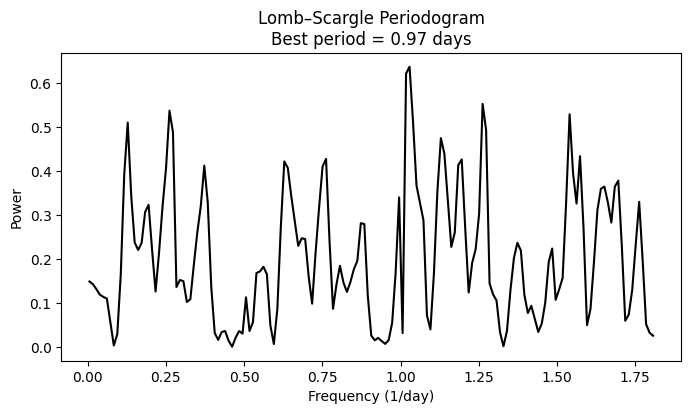

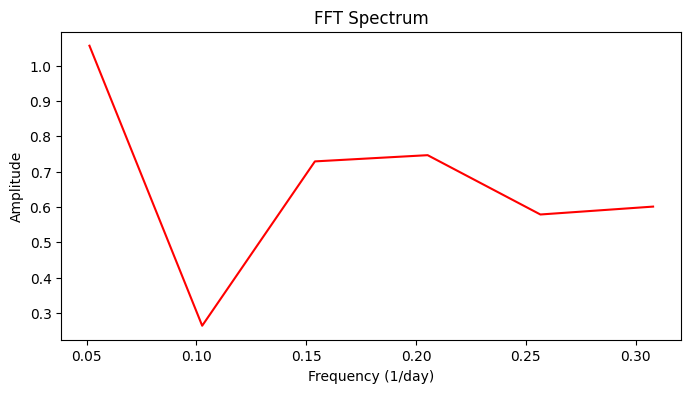

Lomb–Scargle best period: 0.972 days
Lomb–Scargle best frequency: 1.029 1/day


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# ---------------------------
# Step 1: Load data
# ---------------------------
data = {
    "DATE-OBS": [
        "2025-10-13T15:43:19", "2025-10-15T19:02:31", "2025-10-15T19:03:46",
        "2025-10-16T14:53:04", "2025-10-19T14:21:15", "2025-10-20T13:59:25",
        "2025-10-23T14:33:15", "2025-10-24T15:32:45", "2025-10-26T13:00:50",
        "2025-10-27T17:32:41", "2025-10-27T17:42:44", "2025-10-28T16:39:00",
        "2025-10-29T16:54:14", "2025-10-30T14:37:14", "2025-10-31T15:20:41"
    ],
    "Processed_PSF_Mag": [
        13.685, 14.438, 14.474, 14.287, 14.106, 14.27, 14.49,
        np.nan, 14.305, 14.213, 14.129, np.nan, 14.076, 14.209, 14.316
    ]
}

df = pd.DataFrame(data)
df = df.dropna()

# Convert date to datetime
df["DATE-OBS"] = pd.to_datetime(df["DATE-OBS"])

# Convert time to numeric (in days from start)
t = (df["DATE-OBS"] - df["DATE-OBS"].min()).dt.total_seconds() / (24*3600)
y = df["Processed_PSF_Mag"]

# ---------------------------
# Step 2: Lomb–Scargle Periodogram
# ---------------------------
frequency, power = LombScargle(t, y).autopower()
best_freq = frequency[np.argmax(power)]
best_period = 1 / best_freq

plt.figure(figsize=(8,4))
plt.plot(frequency, power, 'k-')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Power")
plt.title(f"Lomb–Scargle Periodogram\nBest period = {best_period:.2f} days")
plt.show()

# ---------------------------
# Step 3: FFT Analysis
# ---------------------------
# Interpolate to uniform spacing
t_uniform = np.linspace(t.min(), t.max(), len(t))
y_interp = np.interp(t_uniform, t, y)

fft = np.fft.fft(y_interp - np.mean(y_interp))
freqs = np.fft.fftfreq(len(t_uniform), d=(t_uniform[1]-t_uniform[0]))

# Keep positive frequencies
mask = freqs > 0
plt.figure(figsize=(8,4))
plt.plot(freqs[mask], np.abs(fft[mask]), 'r-')
plt.xlabel("Frequency (1/day)")
plt.ylabel("Amplitude")
plt.title("FFT Spectrum")
plt.show()

# Print results
print(f"Lomb–Scargle best period: {best_period:.3f} days")
print(f"Lomb–Scargle best frequency: {best_freq:.3f} 1/day")
